In [213]:
#!pip install sweetviz
!pip install matplotlib

In [217]:
import os, sys, re
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#matplotlib.style.use('ggplot')

# EDA библиотеки
#from ydata_profiling import ProfileReport
import sweetviz as sv
import dtale
import statistics as stcs
import statsmodels.stats.proportion as stsmdls

# библиотека для расчетов корреляций
from scipy import stats
from sklearn.metrics import matthews_corrcoef

# для нормализации, стандартизации
from sklearn import preprocessing

# импортируем библиотеки для разделения датасета
from sklearn.model_selection import train_test_split

# импортируем библиотеки модели для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor

# импортируем библиотеки для оценки точности модели
from sklearn import metrics

# библиотека для кодирования признаков
import category_encoders as ce

# для обработки timestamp в формате utc
import datetime, time

# работа с json
import json
from pprint import pprint

# веб-скрэпинг сайтов
import requests
from bs4 import BeautifulSoup

# выводить все результаты вычислений в ячейках Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# подключить Latex
from IPython.display import Latex

# загрузка файлов
import wget
import kaggle

# логгирование / логирование
import logging

# изменить формат вывода pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_info_rows', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.large_repr', 'truncate')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [210]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os, re, time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импорт collections для работы с упорядоченным словарём
from collections import OrderedDict

import category_encoders as ce

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# импортируем библиотеки для разделения датасета
from sklearn.model_selection import train_test_split

# импортируем библиотеки для оценки значимости признаков
from sklearn import feature_selection
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import f_classif

# импортируем библиотеки модели для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor

# импортируем библиотеки для оценки точности модели
from sklearn import metrics

# для нормализации, стандартизации
from sklearn import preprocessing

# импорт библиотеки для анализа текста

import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon', quiet=True)

# раскомментировать, если будут проблемы на kaggle (capture & install)
%%capture
#!pip install lightautoml

#QUICK WORKAROUND FOR PROBLEM WITH PANDAS
!pip install -U pandas

# Определение констант для моделей обучения (в т.ч. lightautoml)
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 600 # equal to 10 minutes
TARGET_NAME = 'reviewer_score'

# команды для максимальной воспроизводимости
#np.random.seed(RANDOM_STATE)
#torch.set_num_threads(N_THREADS)

#Input data files are available in the read-only "../input/" directory
#For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

INPUT_DIR = '/kaggle/input/sf-booking/'
INPUT_DIR = '../data/input/'
INPUT_DIR = './data/input/'
INPUT_DIR = './data/'

# команды для максимальной воспроизводимости
np.random.seed(RANDOM_STATE)

for dirname, _, filenames in os.walk(INPUT_DIR):
# for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# изменить формат вывода pandas
pd.set_option('display.max_info_rows', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

UsageError: Line magic function `%%capture` not found.


In [ ]:
df = pd.read_csv('hotels.csv')
hotels = df.copy()
hotels.head()

## Задание 2.1 В каких столбцах данные содержат пропущенные значения?

In [4]:
cols_null = hotels.isnull().sum()
cols_null[cols_null > 0]

lat    2448
lng    2448
dtype: int64

## Задание 2.2 В каких столбцах данные хранятся в числовом формате?

In [26]:

for col in hotels.columns[hotels.dtypes != 'object']:
    print(col)

additional_number_of_scoring
average_score
review_total_negative_word_counts
total_number_of_reviews
review_total_positive_word_counts
total_number_of_reviews_reviewer_has_given
reviewer_score
lat
lng


## Задание 2.3 В каких столбцах данные представляют собой строки?

In [28]:
for col in hotels.columns[hotels.dtypes == 'object']:
    print(col)

## Задание 2.4 Напишите признак, представляющий собой дату

In [29]:
review_date

NameError: name 'review_date' is not defined

## Задание 4.2 Сколько уникальных названий отелей представлено в наборе данных?

In [35]:
hotels['hotel_name'].nunique()

1492

## Задание 4.3 Ответьте на вопросы о дате размещения отзывов.

In [36]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')
hotels['review_date'].head()

0   2016-02-19
1   2017-01-12
2   2016-10-18
3   2015-09-22
4   2016-03-05
Name: review_date, dtype: datetime64[ns]

## Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd:

In [37]:
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

## Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

In [38]:
hotels['review_date'].min()

Timestamp('2015-08-04 00:00:00')

## Задание 4.4 Сколько уникальных тегов представлено в наборе данных?

In [39]:
hotels['tags'][0]

"[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"

In [40]:
tags = {}
for tag_list in hotels['tags']:
    for _tag in tag_list[3:-3].split(" ', ' "):
        if _tag not in tags:
            tags[_tag] = 1
        else:
            tags[_tag] += 1

# вывести все теги
# print(tags)

# вывести количество тегов
print(len(tags))

2368


## Задание 4.5 Какой тег представлен в наибольшем числе отзывов?

In [41]:
# счётчик
tag_cnt = 0

# переменная-накопитель - самый частый тег
tag_name = ''
for _tag in tags:
    # если встретили тег "пожирнее", переписываем соответствующие переменные:
    # сам тег (ключ словаря), и значение ключа (значение ключа)
    if tags[_tag] > tag_cnt:
        tag_name = _tag
        tag_cnt = tags[_tag]
print(tag_name, tag_cnt)

Leisure trip 313593


## Задание 4.6 Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

In [42]:
for _tag in tags:
    if _tag.lower().find('night') >= 1:
    # if a.lower().find('night') > -1:
        print(_tag, tags[_tag])

Stayed 2 nights 100263
Stayed 1 night 145373
Stayed 3 nights 72000
Stayed 6 nights 7399
Stayed 4 nights 35748
Stayed 5 nights 15611
Stayed 8 nights 1910
Stayed 7 nights 5549
Stayed 10 nights 663
Stayed 14 nights 184
Stayed 19 nights 23
Stayed 13 nights 174
Stayed 9 nights 966
Stayed 17 nights 27
Stayed 11 nights 306
Stayed 27 nights 10
Stayed 12 nights 217
Stayed 15 nights 87
Stayed 21 nights 19
Stayed 18 nights 24
Stayed 16 nights 38
Stayed 26 nights 6
Special Offer Double Room 3 nights minimum 6
Stayed 24 nights 5
Stayed 30 nights 10
Stayed 22 nights 8
King Room with Knightsbridge View 8
Suite with Knightsbridge View 1
Stayed 23 nights 6
Stayed 28 nights 7
Stayed 20 nights 17
Junior Suite Give me the night 4
Stayed 25 nights 4
Knightsbridge Suite 1
Stayed 29 nights 3


## Задание 4.7 Какое значение метрики MAPE вам удалось получить на этом этапе? 

In [43]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" или "datetime64[ns]"" обучаться не будет, просто выберим их и удалим
object_columns = [col for col in hotels.columns 
    if ((hotels[col].dtypes == 'object') | 
    (hotels[col].dtypes == 'datetime64[ns]'))
]
hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
hotels = hotels.fillna(0)

In [44]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [54]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

NameError: name 'train_test_split' is not defined

In [58]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

NameError: name 'RandomForestRegressor' is not defined

In [59]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

NameError: name 'metrics' is not defined

## 1. Загрузка данных и первичный анализ данных

In [95]:
# подгружаем данные из соревнования

# датасет для обучения
df_train = pd.read_csv('hotels_train.csv')

# датасет для предсказания
df_test = pd.read_csv('hotels_test.csv')

# тестовый сабмишн
sample_submission = pd.read_csv('submission.csv')

In [96]:
# чтобы не проводить двойные преобразования df_train и df_test, объединим эти два датасета, 
# а перед запуском обучения модели их разделим, для их различия введём новый признак 'sample'

# помечаем, где у нас трейн
df_train['sample'] = 1

# помечаем, где у нас тест
df_test['sample'] = 0

# в тесте у нас нет значения reviewer_score, мы его должны предсказать, поэтому пока просто заполняем нулями
df_test['reviewer_score'] = 0

# объединяем данные
data = pd.concat([df_test, df_train], sort=False).reset_index(drop=True)

In [97]:
# сверяемся с типом признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [98]:
# знакомимся с данными
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0


In [99]:
# ищем в столбцах данные, содержащие пропущенные значения
data.isnull().sum()

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
sample                                           0
reviewer_score                                   0
dtype: int64

Только 2 столбца содержат пропуски в данных:

lat;

lng.

In [100]:
# ищем в столбцах данные, содержащие числовые значения
digit_columns = [col for col in data.columns if data[col].dtypes != 'object']
digit_columns

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'lat',
 'lng',
 'sample',
 'reviewer_score']

In [101]:
# ищем в столбцах данные, содержащие строковые значения:
object_columns = [col for col in data.columns if data[col].dtypes == 'object']
object_columns

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review']

## 2. Проектирование признаков
### 2.1. Преобразование признака 'hotel_addre

Из него можно выделить два новых признака:
страна, 'hotel_country';
город, 'hotel_city';
Страна в строке указана последней, Англия при поиске образуется как 'Kingdom' - переименуем её как 'United Kingdom';
Город - это второе слово с конца, исключение - Англия - пятое с конца.

In [102]:
# смотрим какие представлены значения
data['hotel_address'].value_counts()

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
Filmteichstra e 5 10 Favoriten 1100 Vienna Austria                                  12
21 rue Lavoisier 8th arr 75008 Paris France                                         12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: hotel_address, Length: 1493, dtype: i

In [103]:
# выделяем страну
data['hotel_country'] = data['hotel_address'].apply(lambda x: x.split()[-1])

# переименовываем 'Kingdom' -> 'United Kingdom'
data.loc[data['hotel_country'] == 'Kingdom', 'hotel_country'] = 'United Kingdom'

# смотрим какие представлены значения
data['hotel_country'].value_counts()

United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: hotel_country, dtype: int64

In [104]:
# выделяем город
data['hotel_city'] = data['hotel_address'].apply \
(lambda x: x.split()[-5] if x.split()[-1] == 'Kingdom' else x.split()[-2])

# смотрим какие представлены значения
data['hotel_city'].value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: hotel_city, dtype: int64

In [105]:
# кодируем страну отеля
data['hotel_country'] = data['hotel_country'].astype('category')
data['hotel_country_code'] = data['hotel_country'].cat.codes

# кодируем город отеля
data['hotel_city'] = data['hotel_city'].astype('category')
data['hotel_city_code'] = data['hotel_city'].cat.codes

In [106]:
# проверяем, что получилось
data[['hotel_country', 'hotel_country_code', 'hotel_city', 'hotel_city_code']]

,hotel_country,hotel_country_code,hotel_city,hotel_city_code
0,Italy,2,Milan,3
1,Netherlands,3,Amsterdam,0
2,Spain,4,Barcelona,1
3,Italy,2,Milan,3
4,Netherlands,3,Amsterdam,0
...,...,...,...,...
515733,United Kingdom,5,London,2
515734,Austria,0,Vienna,5
515735,United Kingdom,5,London,2
515736,United Kingdom,5,London,2


Получено два новых признака - страна и город отеля, на основании которых, можно с определенной точностью заполнить пропуски в 'lat', 'lng'.
Заполним их медианными значениями lat, lng по городам, в которых находятся эти отели.

## 2.2. Преобразование признаков 'lat, lng' - заполнение пропусков в данных

In [108]:
# посмотрим, как пропуски в 'lat' распределяются по городам
print(data[data['lat'].isnull()].groupby('hotel_city', as_index=False).agg(qty=('hotel_city', 'count')),'\n')

# посмотрим, как пропуски в 'lng' распределяются по городам (идентично 'lat')
# print(data[data['lng'].isnull()].groupby('hotel_city', as_index=False).agg(qty=('hotel_city', 'count')))

  hotel_city   qty
0  Amsterdam     0
1  Barcelona   207
2     London     0
3      Milan     0
4      Paris   382
5     Vienna  2679 



In [109]:
# делаем копию датафрейма для обхода конфликта манипуляций с данными
data_coords = data.copy()

# формируем объект SeriesGroupBy
city_data = data_coords.groupby(['hotel_city'], group_keys=False)

# найдем медианные координаты с учетом образовавшихся групп
city_data['lat'].median()
city_data['lng'].median()

# Применим lambda-функцию к SeriesGroupBy, заменяем пропуски соответствующим медианным значением
data_coords['lat'] = city_data['lat'].apply(lambda x: x.fillna(x.median()))
data_coords['lng'] = city_data['lng'].apply(lambda x: x.fillna(x.median()))

# переносим результат в исходный датафрейм
data = data_coords

# сверяемся с типом признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               515738 non-null  object  
 1   additional_number_of_scoring                515738 non-null  int64   
 2   review_date                                 515738 non-null  object  
 3   average_score                               515738 non-null  float64 
 4   hotel_name                                  515738 non-null  object  
 5   reviewer_nationality                        515738 non-null  object  
 6   negative_review                             515738 non-null  object  
 7   review_total_negative_word_counts           515738 non-null  int64   
 8   total_number_of_reviews                     515738 non-null  int64   
 9   positive_review                             515738 non-null

In [ ]:
# ищем пропуски в столбцах
data.isnull().sum()

Пропусков нет

## 2.3. Преобразование признака 'tag'
Довольно содержательный по сути и "загрязненный" по структуре признак, с его помощью можно создать:

бинарный признак заказа с мобильного устройства, новый признак - 'tag_from_mobile', значение 0 (по умолчанию) - заказ был сделан НЕ с мобильного устройства, 1 - заказ с мобильного устройства;

бинарный признак поездки с домашним питомцем, новый признак - 'tag_with_pet', где значение 0 (по умолчанию) - заселение без питомца, 1 - с питомцем;
бинарный признак по типу поездки по наличию тега 'Leisure trip' или 'Business_trip', новый признак - 'tag_leisure_trip', где 0 - деловая поездка, 1 - отдых (по умолчанию);

категориальный признак по наличию тегов 'Solo traveler', 'Couple', 'Travelers with friends', 'Family with young children' и другие, новый признак - 'tag_reviewer_type', где значения от 1 до 6, в зависимости типа состава группы (найденного тега);

порядковый признак по тегу 'Stayed night(s)', новый признак - 'tag_count_nights', основанный на количестве ночей пребывания от 1 до максимального значения, значение по умолчанию - 1, проведена минимально 1 ночь;

бинарный признак по наличию видовых преимуществ из номера, новый признак - 'tag_view_room', значение по умолчанию - 0, т.к. не каждый номер с видовыми преимуществами;


категориальный признак по тегам 'Standard ...', 'Superior ...', 'Deluxe ...', 'Executive ...' и другие - тип комнаты, новый признак - 'tag_view_room', основанный на категории комнаты, значение по умолчанию - 0, если тег не будет найден;

In [111]:
# выведем число тегов для каждого отеля в отдельный признак
data['tags_count'] = data['tags'].apply(lambda x: len(re.findall("'[^\'](.+?)[^\']'", x)))

# посмотрим сколько тегов бывает по количеству, ищем максимум 
data['tags_count'].unique()

array([4, 5, 3, 6, 2, 1], dtype=int64)

In [112]:
# смотрим структуру признака 'tag'
print(data[data['tags_count'] == data['tags_count'].max()]['tags'].iloc[0])
print(data[data['tags_count'] == data['tags_count'].max()]['tags'].iloc[1])

[' With a pet ', ' Leisure trip ', ' Family with young children ', ' Double or Twin Room 1 2 Adults ', ' Stayed 7 nights ', ' Submitted from a mobile device ']
[' With a pet ', ' Leisure trip ', ' Couple ', ' Deluxe Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']


Принцип выделения свойств - максимальное количество тегов 6, знаем возможные типы, все, кроме типа комнаты, укладываются в стандартный шаблон.

Будем искать в каждой строке один из 6 известных шаблонов тега и удалять из строки после обработки. Если останется какой-то еще тег - он и будет типом номера.

In [119]:
def get_tags(tags_string):
    """ Функция кодирования отдельных тегов в новый признак

    Args:
        tags_string (str): строкое значение признака 'tags', передаваемое в обработку

    Returns:
        int: возвращает коды будущих признаков
    """

    # убираем лишнюю информацию (т.н. "мусор")
    tags_string = tags_string.replace('[', '').replace(']', '')
    tags_string = tags_string.replace("' ", '').replace(" '", '')
    
    # "нарезаем" оставшуюся строку тегов во временный список
    tags_list = tags_string.split(',')
    tags_list = list(map(lambda x: x.strip(), tags_list))

    # "кодируем" путешественника(-ов)
    reviewer_types = {
        'Solo traveler': 1,
        'Couple': 2,
        'Travelers with friends': 3,
        'Family with young children': 4,
        'Family with older children': 5,
        'Group': 6
    }

    # "кодируем" тип комнаты
    # словарь "выносится" наружу только ради графиков (для формирования меток по оси абсцисс)
    global room_types
    room_types = {
            'Other': 0,
            'Premier': 1, 'Royal': 2, 'President': 3, 'Presidential': 4, 'Ordinary': 5, 
            'Adjacent': 6, 'Exception': 7, 'Luxury': 8, 'Panoramic': 9, 'Classic': 10, 
            'Loft': 11, 'Montcalm': 12, 'Privilege': 13, 'Special': 14, 'Camper': 15, 
            'Sensation': 16, 'Classique': 17, 'Privilege': 18, 'Wonderful': 19, 'Deluxe': 20,
            'Premium': 21, 'Quadruple': 22, 'Triple': 23, 'Duplex': 24, 'Penthouse': 25, 
            'Townhouse': 26, 'Connecting': 27, 'Apartment': 28, 'Apartments': 29, 'Queen': 30, 
            'King': 31, 'Comfort': 32, 'Large': 33, 'Cosy': 34, 'Cozy': 35, 
            'Extra': 36, 'Plus': 37, 'Club': 38, 'Art': 39, 'View': 40,
            'Studio': 41, 'City': 42, 'Emotion': 43, 'Suite': 44, 'Executive': 45,
            'Superior': 46, 'Guest': 47, 'Family': 48, 'Business': 49,
    }

    # задаем начальные значения новых признаков
    tag_from_mobile = 0
    tag_with_pet = 0
    
    # по умолчанию не считаем поездку командировкой, значение по умолчанию 1
    tag_leisure_trip = 1

    # по умолчанию считаем поездку, что путешественник передвигается один и без детей
    tag_reviewer_type = 1
    
    # если отзыв оставлен и отсутствуют ключевые слова 'Stayed _ night(s)',
    # будем считать, что проведена минимально 1 ночь, значение по умолчанию 1
    tag_count_nights = 1
    
    # номер по умолчанию без видовых преимуществ
    tag_view_room = 0

    # если комната в тегах отсутствует, значение по умолчанию 0
    tag_room_type = 0

    # кодируем значения обнаруженных признаков при их наличии во временном списке
    for _tag in list(tags_list):
        # признак - "отправлено с мобильного устройства"
        if _tag == 'Submitted from a mobile device':
            tag_from_mobile = 1
            tags_list.remove(_tag)

        # признак - путешествие с домашними питомцами
        if _tag == 'With a pet':
            tag_with_pet = 1
            tags_list.remove(_tag)

        # признак - поездка рабочая (командировка)
        if _tag == 'Business trip':
            tag_leisure_trip = 0
            tags_list.remove(_tag)

        # признак - поездка не связана с работой (отпуск)
        if _tag == 'Leisure trip':
            # просто убираем тег из временного списка, т.к. значение по умолчанию 1
            # tag_leisure_trip = 1
            tags_list.remove(_tag)

        # признак - состав путешествующих
        if _tag in reviewer_types.keys():
            tag_reviewer_type = reviewer_types[_tag]
            tags_list.remove(_tag)

        # признак - количество ночей
        if re.fullmatch(r'Stayed\s\d+\snight\w?', _tag):
            tag_count_nights = [int(n) for n in re.findall(r'-?\d+\.?\d*', _tag)][0]
            tags_list.remove(_tag)

        # признак - имеется тег "номер с видом на..."
        if len(tags_list) > 0:
            if ('View' in tags_list[0]) | ('Panoramic' in tags_list[0]):
                tag_view_room = 1

            # кодируем тип номера
            for r_t in room_types.keys():
                if r_t in tags_list[0]:
                    tag_room_type = room_types[r_t]

            # исключения, т.к. тег идет как 'Double or Twin Room 1 2 Adults'
            if ('Double' in tags_list[0]) | ('Twin' in tags_list[0]):
                tag_room_type = 50

    return tag_from_mobile, tag_with_pet, tag_leisure_trip, \
        tag_reviewer_type, tag_count_nights, tag_view_room, tag_room_type

# создаем новые признаки
data[['tag_from_mobile', 'tag_with_pet', 'tag_leisure_trip', 
        'tag_reviewer_type', 'tag_count_nights', 'tag_view_room', 'tag_room_type']
] = pd.DataFrame(data['tags'].apply(get_tags).to_list(), index=data.index).astype('int8')

In [120]:
# задаём маску для отбора тренировочных значений
# БУДЕТ ДЕЙСТВОВАТЬ НА ВСЕ РАСЧЁТЫ
sample_mask = data['sample'] == 1

# смотрим, что получилось по типам помещений 
# визуализация пропусков, какие помещения не закодированы
data[sample_mask].groupby(by='tag_room_type')['tag_room_type'].agg(['count']).sort_index(ascending=True)

,count
tag_room_type,
0,21749
1,180
2,45
4,2
5,66
6,83
7,1
8,361
9,21


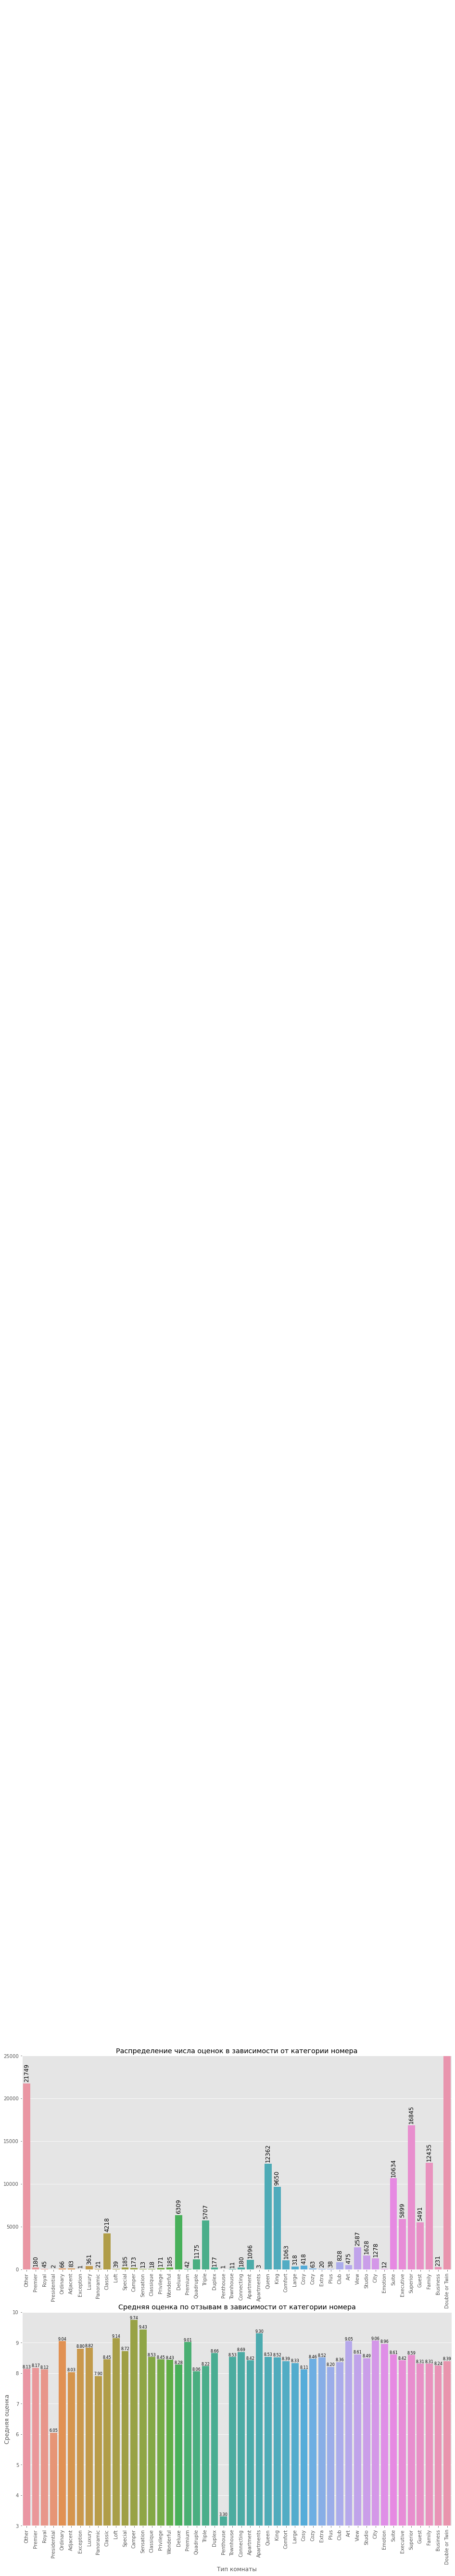

In [121]:
# сводная таблица для визуализации различия в оценках туристов, в зависимости от типа номера
pivot_types = pd.pivot_table(data[sample_mask], 
    index='tag_room_type', 
    values='reviewer_score', 
    aggfunc=['count', 'mean'])

# заготовка списка меток названий помещений для графика
# ===================================================================
# убираем НЕ найденные теги
missed_room_types = [3, 12, 13] # тип помещений не найденных парсером

# собираем в упорядоченный словарь
room_type_ord_dict = OrderedDict(
    (k, v) 
    for k, v in sorted(room_types.items(), key=lambda x: x[1]) 
        if v not in missed_room_types
)

# забираем ключи от пар
room_type_list = list(room_type_ord_dict.keys())

# добавляем исключение вручную
room_type_list.append('Double or Twin')
# ===================================================================

# строим графики
fig, ax = plt.subplots(2, 1, figsize=(16, 18))
bar_types_1 = sns.barplot(
    x=pivot_types.index, 
    y=pivot_types[('count', 'reviewer_score')],
    ax=ax[0]
)

# задаём параметры осей
ax[0].set(ylabel=None, xlabel=None, title='Распределение числа оценок в зависимости от категории номера')
ax[0].set_xticklabels(room_type_list)
ax[0].tick_params(axis='x', rotation=90)

bar_types_2 = sns.barplot(
    x=pivot_types.index, 
    y=pivot_types[('mean', 'reviewer_score')], 
    ax=ax[1]
)

# задаём параметры осей
ax[1].set(xlabel='Тип комнаты', title='Средняя оценка по отзывам в зависимости от категории номера')
ax[1].set_xticklabels(room_type_list)
ax[1].set_ylabel('Средняя оценка', fontsize = 12)
ax[1].tick_params(axis='x', rotation=90)

# выравниваем подписи баров
for p in bar_types_1.patches:
    bar_types_1.annotate(
        '{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 200),
        ha='center', 
        va='bottom', 
        rotation=90,
        fontsize=12
)

for p in bar_types_2.patches:
    bar_types_2.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()),
        ha='center', 
        va='bottom', 
        fontsize=8
)

# для bar_types_1 оценка по последней категории выступает за пределы 260к, 
# а значения количества оценок для некоторых остальных чрезвычайно малы
# задаём лимиты по оси ординат
bar_types_1.set_ylim(0, 25000)
bar_types_2.set_ylim(3, 10)
plt.show();

In [122]:
# смотрим, признаки
data[['tag_from_mobile', 'tag_with_pet', 'tag_leisure_trip', 
        'tag_reviewer_type', 'tag_count_nights', 'tag_room_type', 'tag_view_room']].

SyntaxError: invalid syntax (<ipython-input-122-fda10cb5d1dc>, line 3)

In [123]:
# читаем данные
data[['tag_from_mobile', 'tag_with_pet', 'tag_leisure_trip', 
        'tag_reviewer_type', 'tag_count_nights', 'tag_room_type', 'tag_view_room']].head()

,tag_from_mobile,tag_with_pet,tag_leisure_trip,tag_reviewer_type,tag_count_nights,tag_room_type,tag_view_room
0,0,0,1,2,2,50,0
1,0,0,1,6,1,23,0
2,1,0,0,1,1,50,0
3,0,0,1,2,1,44,0
4,1,0,0,1,2,50,0


In [124]:
# проверяем  типы признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               515738 non-null  object  
 1   additional_number_of_scoring                515738 non-null  int64   
 2   review_date                                 515738 non-null  object  
 3   average_score                               515738 non-null  float64 
 4   hotel_name                                  515738 non-null  object  
 5   reviewer_nationality                        515738 non-null  object  
 6   negative_review                             515738 non-null  object  
 7   review_total_negative_word_counts           515738 non-null  int64   
 8   total_number_of_reviews                     515738 non-null  int64   
 9   positive_review                             515738 non-null

## 2.4. Преобразование признака 'reviewer_nationality'

In [125]:
# удаляем ненужные пробелы
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip())

# смотрим распределение национальности путешественников
data['reviewer_nationality'].value_counts(normalize=True).nlargest(30) * 100

United Kingdom              47.552439
United States of America     6.871124
Australia                    4.204848
Ireland                      2.874909
United Arab Emirates         1.984535
Saudi Arabia                 1.735571
Netherlands                  1.700864
Switzerland                  1.682637
Germany                      1.539735
Canada                       1.530622
France                       1.414672
Israel                       1.281659
Italy                        1.185486
Belgium                      1.169392
Turkey                       1.055575
Kuwait                       0.953973
Spain                        0.918490
Romania                      0.882619
Russia                       0.756198
South Africa                 0.740880
India                        0.666424
Greece                       0.660413
China                        0.659249
Sweden                       0.653045
New Zealand                  0.627644
Singapore                    0.599335
Hong Kong   

In [126]:
# оставим 25 наиболее путешествующих национальностей
top_25_tourist_nations = data['reviewer_nationality'].value_counts().nlargest(25).index
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
    lambda x:x if x in top_25_tourist_nations else 'Other')
data['reviewer_nationality'].value_counts(normalize=True) * 100

United Kingdom              47.552439
Other                       14.696997
United States of America     6.871124
Australia                    4.204848
Ireland                      2.874909
United Arab Emirates         1.984535
Saudi Arabia                 1.735571
Netherlands                  1.700864
Switzerland                  1.682637
Germany                      1.539735
Canada                       1.530622
France                       1.414672
Israel                       1.281659
Italy                        1.185486
Belgium                      1.169392
Turkey                       1.055575
Kuwait                       0.953973
Spain                        0.918490
Romania                      0.882619
Russia                       0.756198
South Africa                 0.740880
India                        0.666424
Greece                       0.660413
China                        0.659249
Sweden                       0.653045
New Zealand                  0.627644
Name: review

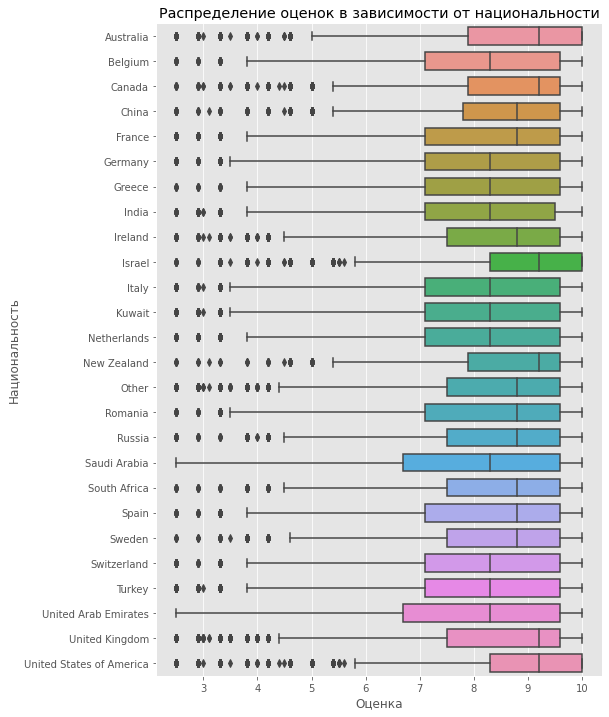

In [127]:
# посмотрим зависит ли оценка от национальности
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 12))

# строим график
nationality = sns.boxplot(
    data = data[sample_mask].sort_values(by='reviewer_nationality', ascending=True),
    y = 'reviewer_nationality',
    x = 'reviewer_score',
    orient ='h',
    width = 0.7
)

# задаём названия осей и заголовок
nationality.set(xlabel='Оценка', ylabel='Национальность', title='Распределение оценок в зависимости от национальности');

Наибольший диапазон оценок у Саудовской Аравии и ОАЭ.
Наивысшая медиана оценок у Великобритании, США, Канады и Австралии.

Так как есть связь между оценкой рецензента и национальностью, то применим кодирование Target Encoding, таким кодированием сформируем "веса" признака 'reviewer_nationality' в зависимости от оценки рецензента. Параметры кодировщика использованы стандартные, по умолчанию.

In [128]:
# кодируем признак
data['reviewer_nationality'] = data['reviewer_nationality'].astype('category')
reviewer_nationality_te = ce.TargetEncoder(
    min_samples_leaf=20, smoothing=10).fit_transform(
        data['reviewer_nationality'], data['reviewer_score'])

# переименовываем признак для удобства "отсева"
reviewer_nationality_te.rename(columns={'reviewer_nationality': 'reviewer_nationality_te'}, inplace=True)
data = pd.concat([data, reviewer_nationality_te], axis=1)

In [129]:
data[['reviewer_nationality', 'reviewer_nationality_te']]

,reviewer_nationality,reviewer_nationality_te
0,United Kingdom,6.369877
1,Belgium,6.130857
2,Sweden,6.230374
3,United States of America,6.578125
4,United Kingdom,6.369877
...,...,...
515733,France,6.189515
515734,Turkey,6.028747
515735,Netherlands,6.128055
515736,United Arab Emirates,5.872975


## 2.5. Преобразование признака 'review_date'

In [130]:
# 'review_date' переводим в формат datetime64
data['review_date'] = pd.to_datetime(data['review_date'], yearfirst=True)

# создаём новый признак 'год-месяц'
data['year_month'] = data['review_date'].dt.to_period("M")

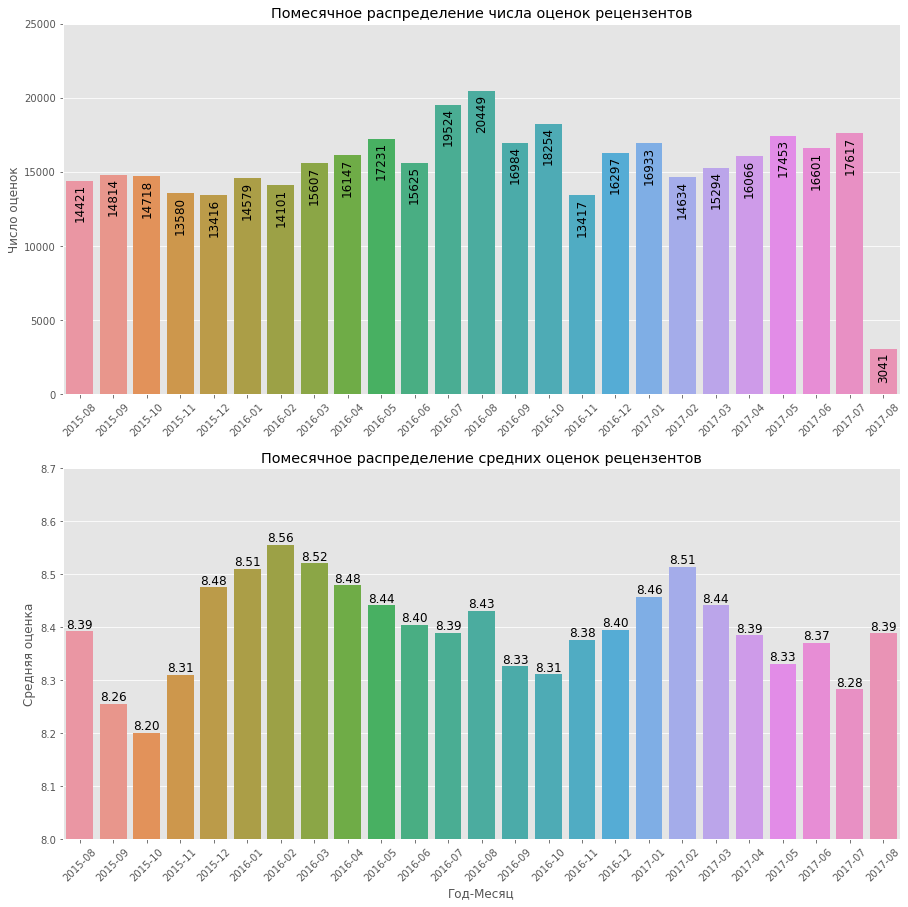

In [131]:
# сводная помесячная таблица для визуализации разницы средних оценок рецензентов
period = data[data['sample']==1].pivot_table(
    values='reviewer_score',
    index='year_month',
    aggfunc=['mean', 'count']
)

# строим график
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
bar_period_1 = sns.barplot(
    x=period.index, 
    y=period[('count', 'reviewer_score')], 
    ax=ax[0]
)
ax[0].set(xlabel=None, title='Помесячное распределение числа оценок рецензентов')
ax[0].set_ylabel('Число оценок', fontsize = 12)
ax[0].tick_params(axis='x', rotation=45)

bar_period_2 = sns.barplot(
    x=period.index, 
    y=period[('mean', 'reviewer_score')], 
    ax=ax[1]
)
ax[1].set(xlabel='Год-Месяц', title='Помесячное распределение средних оценок рецензентов')
ax[1].set_ylabel('Средняя оценка', fontsize = 12)
ax[1].tick_params(axis='x', rotation=45)

# выравниваем подписи баров
for p in bar_period_1.patches:
    bar_period_1.annotate(
        '{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() - 200),
        ha='center', 
        va='top', 
        rotation=90,
        fontsize=12
)

for p in bar_period_2.patches:
    bar_period_2.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()),
        ha='center', 
        va='bottom', 
        fontsize=12
)

# задаём лимиты по оси ординат
bar_period_1.set_ylim(0, 25000)
bar_period_2.set_ylim(8, 8.7)
plt.show();

Так как есть связь между оценкой рецензента и сезонностью, это минимум 4 месяца в году, то применим кодирование Target Encoding, таким кодированием сформируем "веса" признака 'review_date' в зависимости от оценки рецензента. Параметры кодировщика использованы стандартные, по умолчанию.

In [132]:
# кодируем признак 'year_month'
data['year_month'] = data['year_month'].astype('category')
period_te = ce.TargetEncoder(
    min_samples_leaf=20, smoothing=10).fit_transform(
        data['year_month'], data['reviewer_score']
)

# переименовываем признак для удобства "отсева"
period_te.rename(columns={'year_month': 'year_month_te'}, inplace=True)
data = pd.concat([data, period_te], axis=1)

In [133]:
# читаем полученные данные
data[['year_month', 'year_month_te']]

,year_month,year_month_te
0,2017-07,6.227448
1,2016-12,6.310881
2,2015-11,6.249967
3,2015-10,6.194355
4,2016-05,6.304499
...,...,...
515733,2017-04,6.294678
515734,2017-02,6.385457
515735,2016-02,6.398011
515736,2017-05,6.208587


## 2.6. Преобразование признака 'days_since_review'

In [134]:
# из признака 'days_since_review' выделим число, удалив слова day(s), меняем тип данных на int.
data['days_since_review'] = data['days_since_review'].apply(
    lambda x: int(re.findall(r'\d+', x)[0])).astype('int16')

In [137]:
# читаем полученные данные
data['days_since_review']

0          13
1         234
2         616
3         656
4         444
         ... 
515733    106
515734    171
515735    543
515736     74
515737    363
Name: days_since_review, Length: 515738, dtype: int16

In [142]:
# проверим тип признаков
data['days_since_review'].info()

AttributeError: 'Series' object has no attribute 'info'

In [139]:
data['days_since_review'].max()

730

## 2.7. Преобразование признака 'hotel_name'

In [144]:
# соберём сводную таблицу с уникальным числом имён отелей, адресов
pivot_name_addr = data[['hotel_address', 'hotel_name']].groupby(
    by='hotel_name').nunique()

# отсеиваем отели с именами-дубликатами
mask_hotel_name = pivot_name_addr['hotel_address'] != 1
hotel_name_dupl = pivot_name_addr[mask_hotel_name].index.to_list()

# выводим число отелей с именами-дубликатами
mask_name_dupl = data['hotel_name'].isin(hotel_name_dupl)
hotel_addr_dupl = data[mask_name_dupl][['hotel_name', 'hotel_address']].value_counts()
hotel_addr_dupl

hotel_name    hotel_address                                             
Hotel Regina  Bergara 2 4 Eixample 08002 Barcelona Spain                    590
              Rooseveltplatz 15 09 Alsergrund 1090 Vienna Austria           284
              Via Cesare Correnti 13 Milan City Center 20123 Milan Italy     60
dtype: int64

In [148]:
# дополним названия отелей, добавив в название город
data['hotel_name'] = data.apply(
    lambda row: (row['hotel_name'] + ' ' + row['hotel_address'].split()[-2])
    if (row['hotel_name'] in hotel_name_dupl)
    else row['hotel_name'], axis=1)

# смотрим, что получилось
mask = data['hotel_name'].str.contains(hotel_name_dupl[0])
data[mask]['hotel_name'].value_counts()

Hotel Regina Barcelona    590
Hotel Regina Vienna       284
Hotel Regina Milan         60
Name: hotel_name, dtype: int64

In [149]:
# кодируем hotel_name - признак не совсем информативный, просто его не стоит удалять - по нему группируются отзывы
data['hotel_name'] = data['hotel_name'].astype('category')
data['hotel_name_code'] = data['hotel_name'].cat.codes

In [150]:
# читаем полученные данные
data['hotel_name_code']

0          612
1         1447
2           33
3          735
4          633
          ... 
515733     711
515734     104
515735     177
515736    1366
515737    1373
Name: hotel_name_code, Length: 515738, dtype: int16

## 2.8. Преобразование признаков 'negative_review', 'positive_review'

Надо обработать 'negative_review','positive_review'.
Возьму Анализ настроений с помощью SentimentIntensityAnalyzer библиотеки VADER
Его в этом проекте многие делали

In [151]:
# дропнем первые  и последние пробелы в признаке негативных отзывов
data['negative_review'] = data['negative_review'].apply(lambda x: x.strip())
data['negative_review'].value_counts().reset_index().head(25)

,index,negative_review
0,No Negative,127890
1,Nothing,18531
2,nothing,2508
3,None,1166
4,N A,1060
5,,849
6,Nothing really,570
7,N a,520
8,All good,470
9,Small room,455


In [152]:
# дропнем первые  и последни пробелы в позитивных отзывах
data['positive_review'] = data['positive_review'].apply(lambda x: x.strip())
data['positive_review'].value_counts().reset_index().head(25)

,index,positive_review
0,No Positive,35946
1,Location,10137
2,Everything,2897
3,location,1736
4,Nothing,1468
5,Great location,1419
6,The location,1341
7,Good location,1203
8,Breakfast,664
9,Friendly staff,603


In [178]:
%%time

# корректируем явные выражения 
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('No Negative', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('N A', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('All good', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('No complaints', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('Nothing to dislike', 'Positive'))
data['positive_review'] = data['positive_review'].apply(lambda x: x.replace('No Positive', 'Negative'))

# создаем два экземпляра анализатора, чтобы разделить лексикон 
# для разной системы оценки положительных и отрицательных отзывов
sia_neg = SentimentIntensityAnalyzer()
sia_pos = SentimentIntensityAnalyzer()

# добавим контекст, чтобы "No Negative" тонально нёс негативную окраску
neg_words = {'small': -1, 'nothing': 10}
pos_words = {'nothing': -10, 'everything': 10}
sia_neg.lexicon.update(neg_words)
sia_pos.lexicon.update(pos_words)

data['neg_scores'] = data['negative_review'].apply(lambda x: sia_neg.polarity_scores(x))
data['pos_scores'] = data['positive_review'].apply(lambda x: sia_pos.polarity_scores(x))

# формируем новые признаки
data['n_review_sentiments_neg'] = data['neg_scores'].apply(lambda x: x['neg'])
data['n_review_sentiments_neu'] = data['neg_scores'].apply(lambda x: x['neu'])
data['n_review_sentiments_pos'] = data['neg_scores'].apply(lambda x: x['pos'])
data['n_review_sentiments_compound'] = data['neg_scores'].apply(lambda x: x['compound'])

data['p_review_sentiments_neg'] = data['pos_scores'].apply(lambda x: x['neg'])
data['p_review_sentiments_neu'] = data['pos_scores'].apply(lambda x: x['neu'])
data['p_review_sentiments_pos'] = data['pos_scores'].apply(lambda x: x['pos'])
data['p_review_sentiments_compound'] = data['pos_scores'].apply(lambda x: x['compound'])

Wall time: 10min 24s


In [155]:
# сверяемся с типом признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  category      
 5   reviewer_nationality                        515738 non-null  category      
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

## 2.9. Преобразование признаков 'review_total_negative_word_counts', 'review_total_positive_word_counts'

Целевая переменная демонстрирует зависимость от обеих величин. Соединим оба признака в один, вычислив разницу количества слов в позитивной и негативной частях отзыва, предварительно нормализуем оба признака:

In [179]:
# кодируем исходный признак
data_ttl_pos_words_cnts_mm = preprocessing.MinMaxScaler().fit_transform(
    data[['review_total_positive_word_counts']])
data_ttl_neg_words_cnts_mm = preprocessing.MinMaxScaler().fit_transform(
    data[['review_total_negative_word_counts']])

# преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_ttl_pos_words_cnts_mm = pd.DataFrame(
    data_ttl_pos_words_cnts_mm, columns=['review_ttl_pos_word_cnts_norm'])
data_ttl_neg_words_cnts_mm = pd.DataFrame(
    data_ttl_neg_words_cnts_mm, columns=['review_ttl_neg_word_cnts_norm'])

# посмотреть результаты
# display(data_ttl_pos_words_cnts_mm, data_ttl_neg_words_cnts_mm)

# добавляем к основному датасету
data = pd.concat([data, data_ttl_pos_words_cnts_mm], axis=1)
data = pd.concat([data, data_ttl_neg_words_cnts_mm], axis=1)

# соединим эти показатели в один - разностный
data['review_ttl_word_cnts_diff_norm'] = data['review_ttl_pos_word_cnts_norm'] - \
    data['review_ttl_neg_word_cnts_norm']

# добавим флаг, который показывает преобладают ли позитивные слова 
# над негативными в размерностях соответствующих диапазонов
data['more_positive_words_flag'] = data['review_ttl_word_cnts_diff_norm'].apply(
    lambda x: 1 if x >= 0 else 0).astype('int8')

 добавим долю одной из частей (второй показатель будет обратно пропорциональным):

In [174]:
# формируем новый дополнительный признак из числа основных
data['review_total_word_counts'] = data['review_total_positive_word_counts'] + \
    data['review_total_negative_word_counts']

# если общее количество слов равно 0, то считаем обе части равнозначными - по 0.5
data['review_positive_word_proportion'] = data.apply(
    lambda x: 0.5 if x['review_total_word_counts'] == 0 \
        else (x['review_total_positive_word_counts'] / x['review_total_word_counts']),
    axis=1)

# удаление вспомогательных дополнительных признаков
data.drop(['review_ttl_pos_word_cnts_norm', 
    'review_ttl_neg_word_cnts_norm', 
    'review_ttl_word_cnts_diff_norm',
    'review_total_word_counts'], axis = 1, inplace=True)

In [175]:
# смотрим результат
data[['more_positive_words_flag', 'review_positive_word_proportion']]

,more_positive_words_flag,review_positive_word_proportion
0,1,0.543860
1,0,0.000000
2,1,0.625000
3,1,1.000000
4,1,1.000000
...,...,...
515733,1,1.000000
515734,1,1.000000
515735,0,0.428571
515736,1,1.000000


##  2.10. Преобразование признака 'total_number_of_reviews_reviewer_has_given'

In [176]:
# вычисляем долю рецензий данных рецензентом от общего числа отзывов в датасете
data['ratio_of_review'] = data['total_number_of_reviews_reviewer_has_given'] / \
    data['total_number_of_reviews']

# логарифмируем значение признака, чтобы оставить только информацию о степени (порядке) активности рецензента
data['total_number_of_reviews_reviewer_has_given'] = data['total_number_of_reviews_reviewer_has_given'].apply(
    lambda x: np.log(x + 1))

In [177]:
# проверка результата
data['ratio_of_review']

0         0.000060
1         0.001395
2         0.042735
3         0.005833
4         0.000427
            ...   
515733    0.016207
515734    0.000310
515735    0.007634
515736    0.017869
515737    0.001654
Name: ratio_of_review, Length: 515738, dtype: float64

## 3. Очистка и выбор признаков
### 3.1 Очистка датасета от исходных (и более не требующихся) признаков

In [181]:
# проверим признаки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 50 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   hotel_address                               object        
 1   additional_number_of_scoring                int64         
 2   review_date                                 datetime64[ns]
 3   average_score                               float64       
 4   hotel_name                                  category      
 5   reviewer_nationality                        category      
 6   negative_review                             object        
 7   review_total_negative_word_counts           int64         
 8   total_number_of_reviews                     int64         
 9   positive_review                             object        
 10  review_total_positive_word_counts           int64         
 11  total_number_of_reviews_reviewer_has_given  float64 

In [182]:
# создаем копию датафрейма (для повторного воспроизведения шагов с уже обработанными данными)
data_copy = data.__deepcopy__()

In [183]:
# # "включить машину времени для датафрейма"
# data = data_copy

In [184]:
# убираем нечисловые признаки, т.к. модель может обучаться только на числовых признаках
object_columns = [col for col in data.columns
    if ((data[col].dtypes == 'object') | \
        (data[col].dtype.name == 'category') | \
        (data[col].dtypes == 'datetime64[ns]'))]

# смотрим, что попадает под удаление
print(f'Удалению подлежит {len(object_columns)} столбцов с нечисловыми данными:')
object_columns

Удалению подлежит 12 столбцов с нечисловыми данными:


['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'hotel_country',
 'hotel_city',
 'year_month',
 'neg_scores',
 'pos_scores']

In [185]:
# удаляем выбранные признаки по заданным критериям
data.drop(object_columns, axis = 1, inplace=True)

In [186]:
# сверяемся с типом признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 38 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   additional_number_of_scoring                int64  
 1   average_score                               float64
 2   review_total_negative_word_counts           int64  
 3   total_number_of_reviews                     int64  
 4   review_total_positive_word_counts           int64  
 5   total_number_of_reviews_reviewer_has_given  float64
 6   days_since_review                           int16  
 7   lat                                         float64
 8   lng                                         float64
 9   sample                                      int64  
 10  reviewer_score                              float64
 11  hotel_country_code                          int8   
 12  hotel_city_code                             int8   
 13  tags_count                   

## 3.2 Анализ мультиколлинеарности

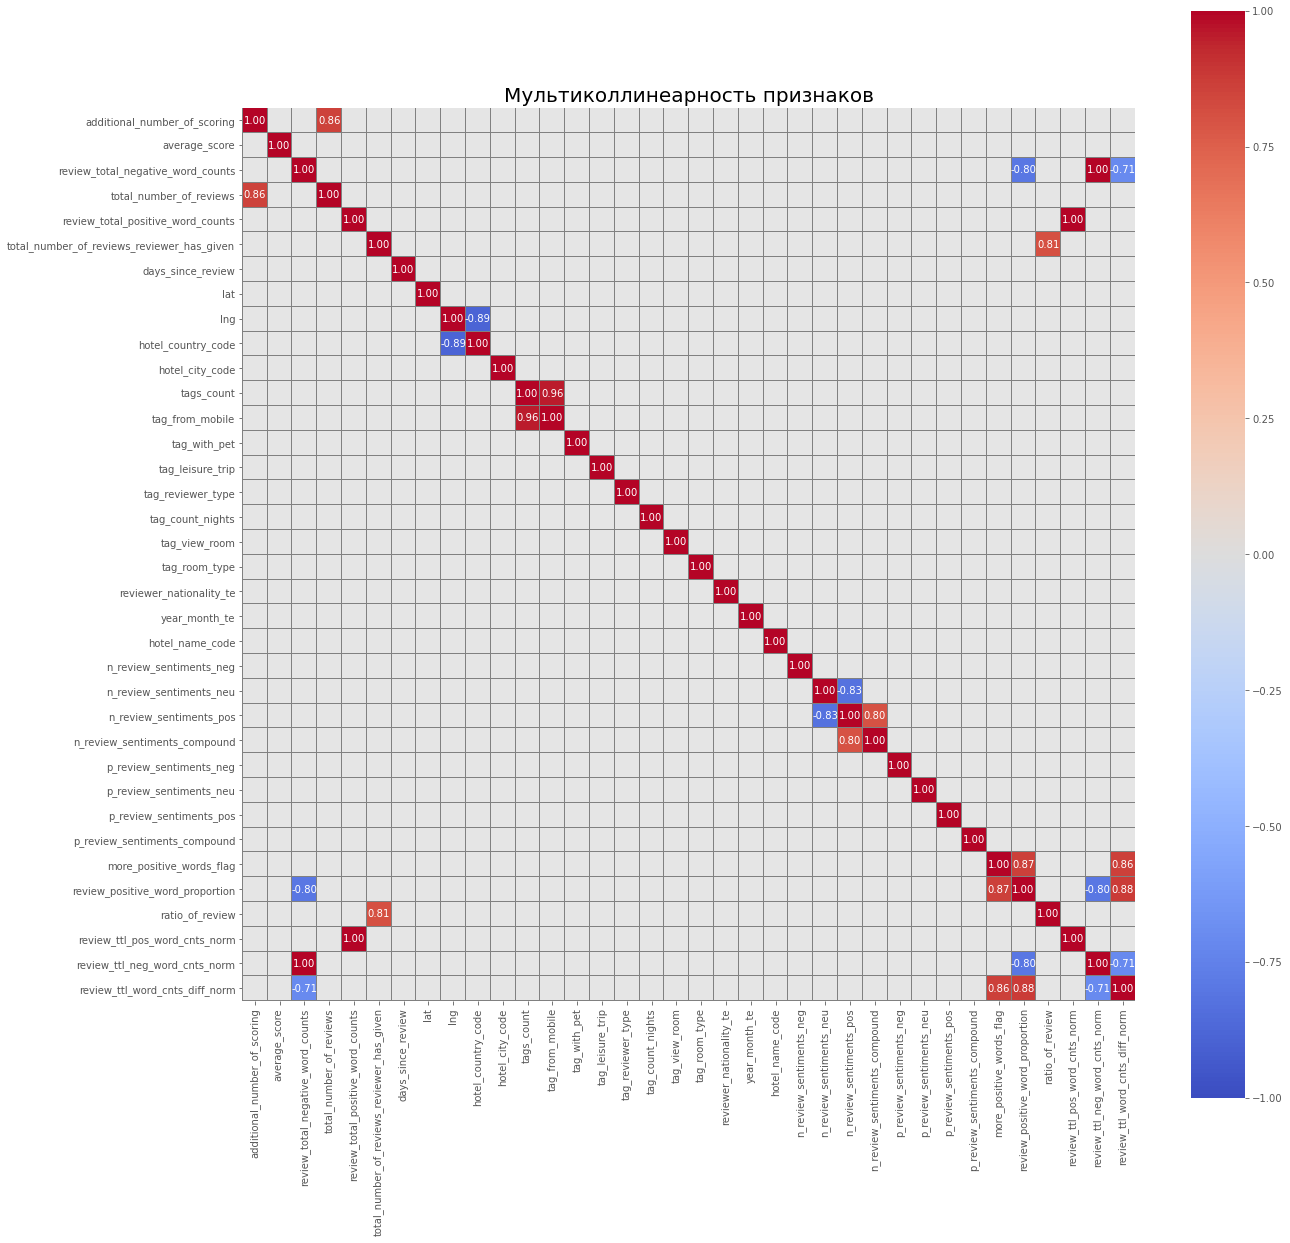

In [187]:
# строим тепловую корреляционную матрицу и анализируем данные на предмет наличия мультиколлинеарности
# используем метод Спирмана, т.к. у нас не только непрерывные переменные

# данные для построения графика
corr = data.drop(['sample', 'reviewer_score'], axis=1).corr(method='spearman')
plt.subplots(figsize=(20, 20))

# график - тепловая матрица с коэффициентами корреляции не менее 0.7
ax_heat_multicoll = sns.heatmap(
    corr[corr.abs() >= 0.7], 
    vmin=-1, 
    vmax=1, 
    linewidth=0.1, 
    linecolor='gray', 
    cmap='coolwarm',
    annot = True,
    fmt='.2f',
    square=True
)

# задаём заголовок
ax_heat_multicoll.set_title('Мультиколлинеарность признаков', fontsize=20);


Исходя из представленной тепловой матрицы смело можно удалить:

lat;
lng;
Эти признаки ни на что не повлияют, а остальные стоит рассмотреть в разрезе оценки ANOVA и Хи-квадрат

## 3.3 Оценка значимости признаков
Для оценки значимости признаков будем использовать тесты:

хи-квадрат - для категориальных,

тест ANOVA - для числовых (непрерывных) признако

In [188]:
# разделим признаки на 2 группы - категориальные и числовые
data.columns

Index(['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'lat', 'lng', 'sample', 'reviewer_score', 'hotel_country_code', 'hotel_city_code', 'tags_count', 'tag_from_mobile', 'tag_with_pet', 'tag_leisure_trip', 'tag_reviewer_type', 'tag_count_nights', 'tag_view_room', 'tag_room_type', 'reviewer_nationality_te', 'year_month_te', 'hotel_name_code', 'n_review_sentiments_neg', 'n_review_sentiments_neu', 'n_review_sentiments_pos', 'n_review_sentiments_compound', 'p_review_sentiments_neg', 'p_review_sentiments_neu', 'p_review_sentiments_pos', 'p_review_sentiments_compound', 'more_positive_words_flag', 'review_positive_word_proportion', 'ratio_of_review', 'review_ttl_pos_word_cnts_norm', 'review_ttl_neg_word_cnts_norm', 'review_ttl_word_cnts_diff_norm'], dtype='object')

In [189]:
# категориальные признаки
cat_cols = [
    'average_score',
    'reviewer_nationality_te', 
    
    'hotel_country_code', 
    'hotel_city_code', 
    'tag_from_mobile', 
    'tag_with_pet',
    'tag_leisure_trip', 
    'tag_reviewer_type', 
    'tag_count_nights', 
    'tag_view_room', 
    'tag_room_type', 
    'year_month_te', 
    'hotel_name_code', 

    'more_positive_words_flag'
]

# числовые (непрерывные) признаки
num_cols = [
    'additional_number_of_scoring', 
    'review_total_negative_word_counts', 
    'review_total_positive_word_counts', 
    'total_number_of_reviews_reviewer_has_given', 
    'total_number_of_reviews', 
    'days_since_review', 
    
    'tags_count', 
    
    'n_review_sentiments_neg', 'n_review_sentiments_neu',
    'n_review_sentiments_pos', 'n_review_sentiments_compound',
    'p_review_sentiments_neg', 'p_review_sentiments_neu',
    'p_review_sentiments_pos', 'p_review_sentiments_compound',
    
    'review_positive_word_proportion', 
    'ratio_of_review'
]

In [190]:
# разбиваем датасет на части, необходимые для оценки признаков
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)
X = data[sample_mask].drop(['reviewer_score'], axis = 1)
y = data[sample_mask]['reviewer_score'].astype('int')

In [191]:
# функция построения тепловой матрицы корреляции для группы признаков
def show_corr_heatmap(columns_list, method='pearson', title_heat=None):
    """ Функция строит тепловую матрицу корреляции по переданным параметрам,
        на выходе - график, никакие значения не возвращаются

    Args:
        columns_list (list): список признаков, для которых строится матрица корреляции
        method (str, optional): расчётный метод корреляции. Defaults to 'pearson'.
        title_heat (str, optional): заголовок графика. Defaults to None.
    """
    _, ax_heat = plt.subplots(figsize=(15, 15))
    # данные для построения графика
    corr = data[columns_list].corr(method=method)
    
    # задаём срезовую маску, выводятся параметры по нижней диагонали
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # график - тепловая матрица
    sns.heatmap(
        corr,
        ax=ax_heat,
        vmin=-1, 
        vmax=1, 
        mask=mask,
        linewidths=0.1,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        square=True)
    
    # задаём заголовок и кегль начертания
    ax_heat.set_title(title_heat, fontsize=20)
    plt.show()

## 3.3.1 Оценка значимости категориальных признаков

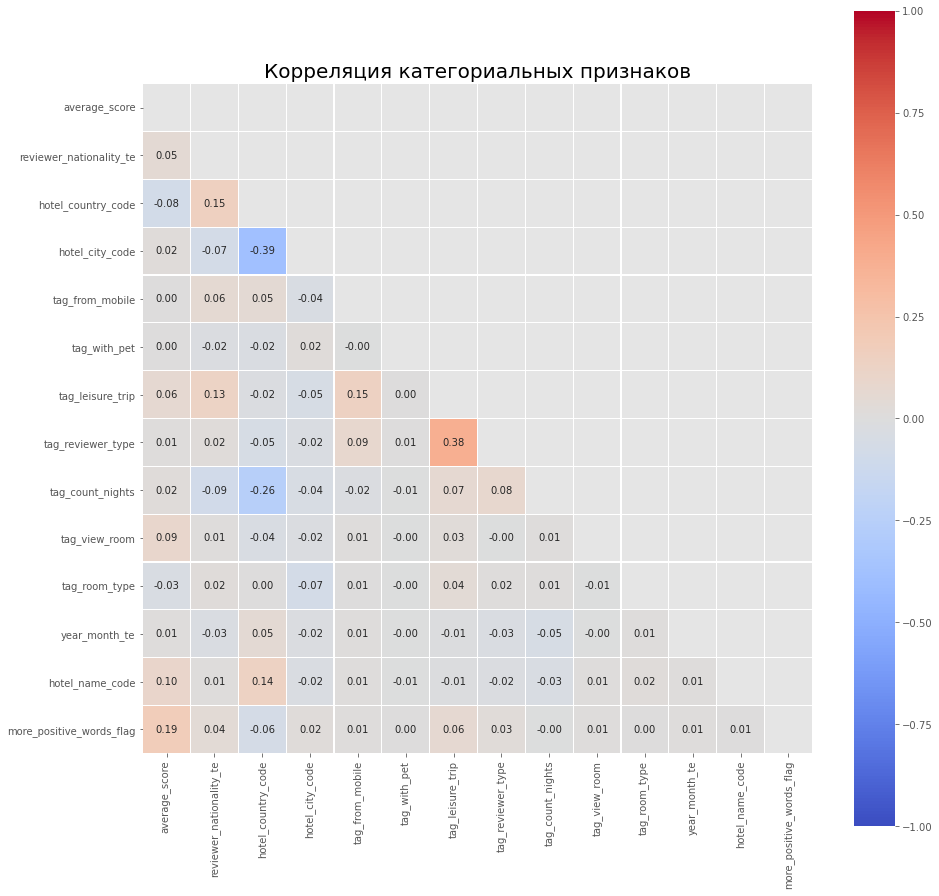

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

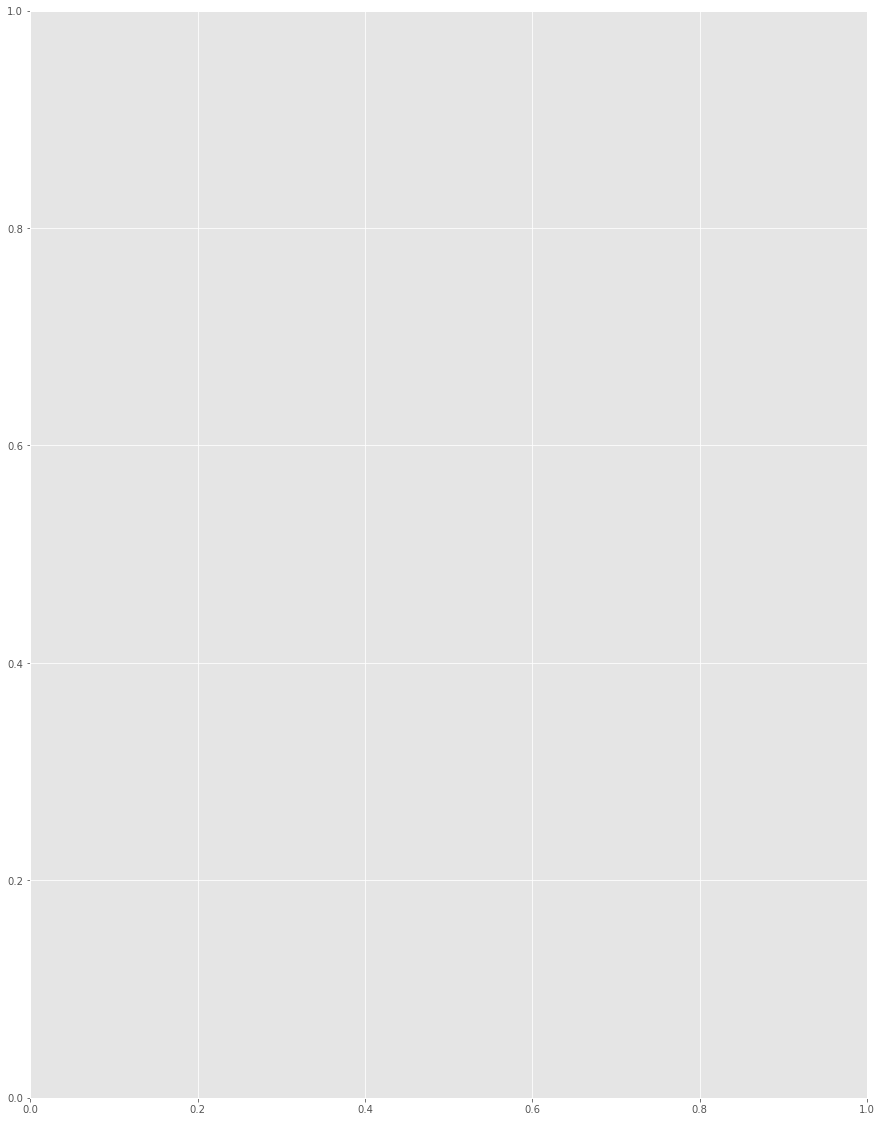

In [192]:
# графики категориальных признаков

# тепловая матрица категориальных признаков
show_corr_heatmap(
    cat_cols, 
    method='spearman',
    title_heat='Корреляция категориальных признаков'
)

# визуализируем результат анализа значимости
# столбчатая диаграмма категориальных признаков по "хи-квадрат"
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index = cat_cols)
imp_cat.sort_values(inplace = True)
_, ax_barh_chi2 = plt.subplots(figsize=(15, 20))
imp_cat.plot(kind = 'barh', title='Оценка числовых признаков по "Хи-квадрат"');

## 3.3.2 Оценка значимости числовых признаков

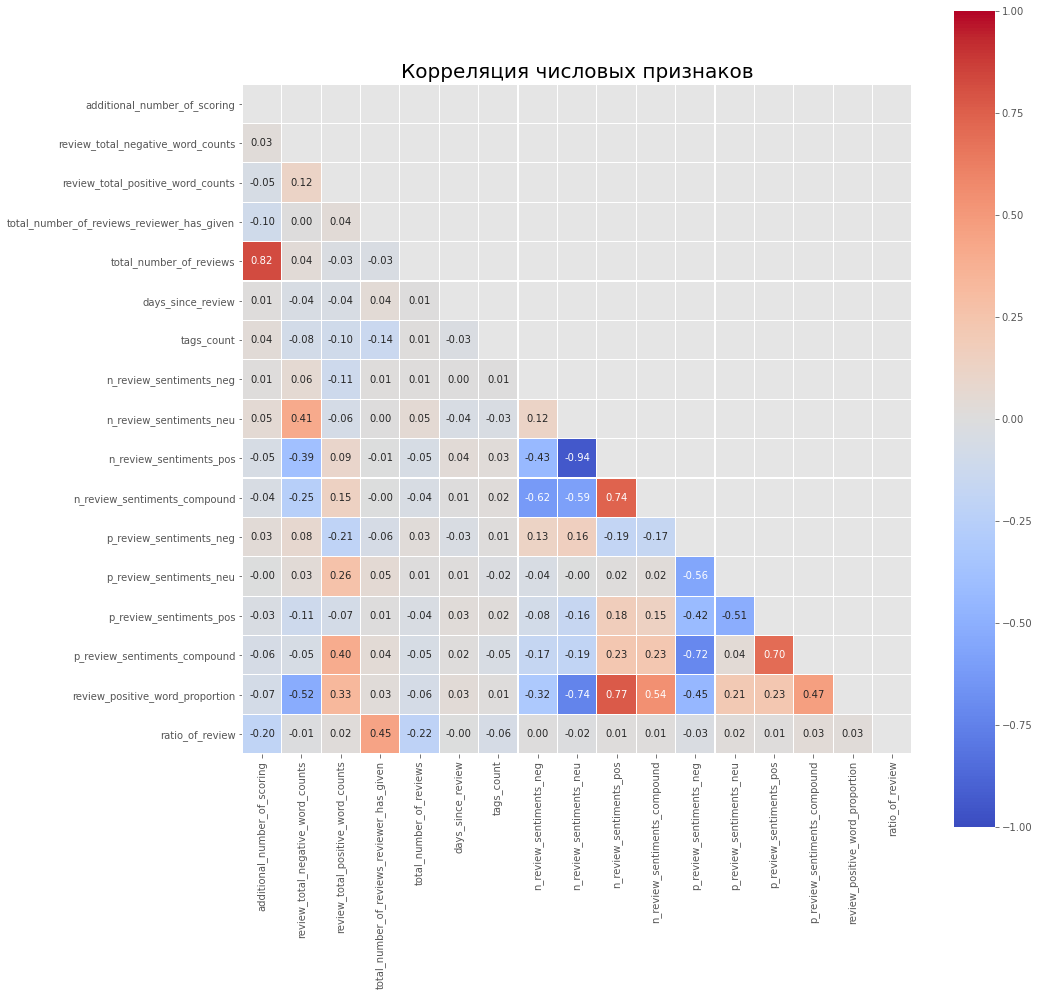

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

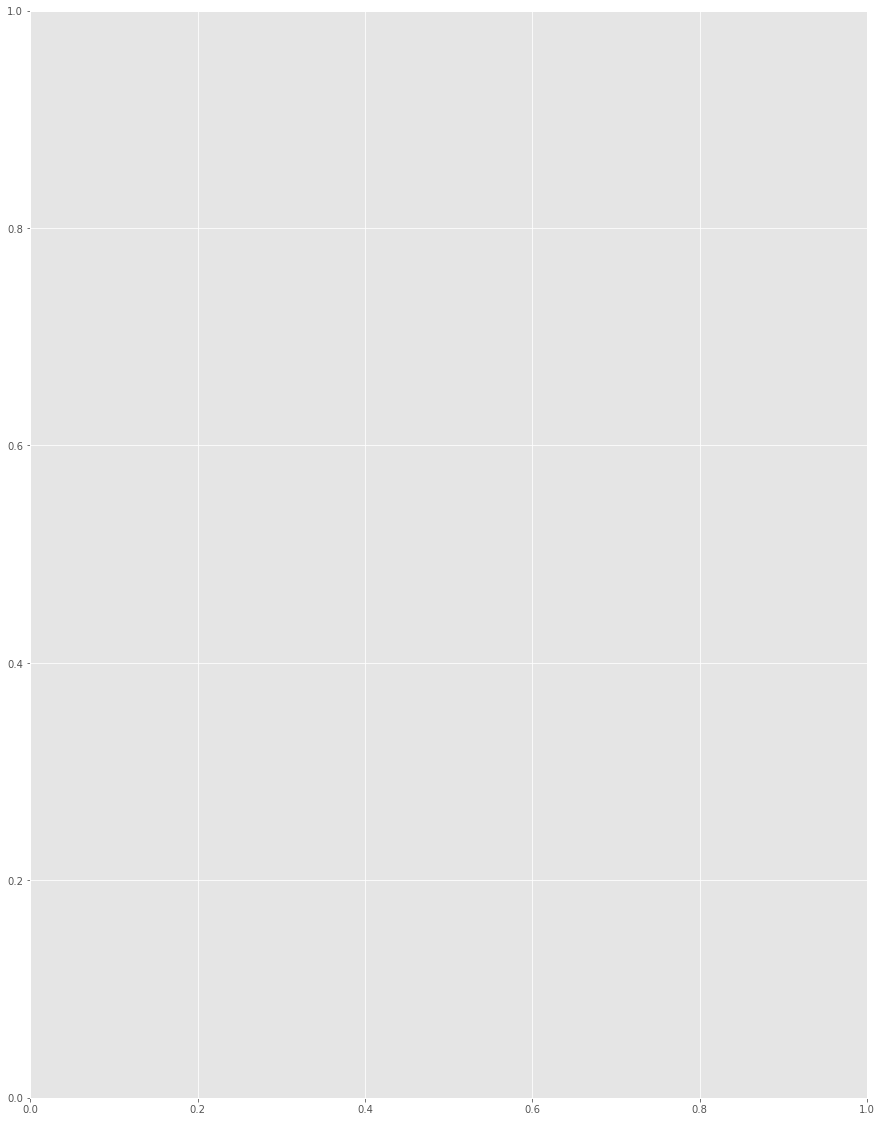

In [193]:
# графики числовых признаков

# тепловая матрица числовых признаков
show_corr_heatmap(
    num_cols, 
    method='pearson', 
    title_heat='Корреляция числовых признаков'
)

# визуализируем результат анализа значимости
# столбчатая диаграмма категориальных признаков по ANOVA
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
_, ax_barh_anova = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh', title='Оценка числовых признаков по "ANOVA"');

удаление маловлияющих признаков влияет на точность модели  до 1-2 знака после запятой), ограничимся удалением:

Неинформативных признаков, не влияющих на MAPE модели обучения:
lat;
lng;
Самые высококоррелирующие признаки:
additional_number_of_scoring;
n_review_sentiments_pos.

Остальные высококоррелирующие параметры оставим для построения модели и их удалять не будет, т.к. их и создавали как вспомогательные для уточнения и корректировки при построении модели

In [ ]:
# признаки к удалению
drop_columns = [
    # просто ни с чем не связаны
    'lat', 
    'lng', 

    # имеют высокую корреляцию
    'additional_number_of_scoring', 
    'n_review_sentiments_pos', 
    # ===================================
    # 'average_score', 
    # 'hotel_country_code',

    # имеют очень маленькую корреляцию
    # 'days_since_review', 
    # 'tags_count', 
    # 'tag_from_mobile', 
    # 'tag_with_pet', 
    
    # экспериментальное удаление признаков
    # 'year_month_te',
    # 'reviewer_nationality_te',
    # 'p_review_sentiments_neu', 
    # 'ratio_of_review', 
]

data.drop(drop_columns, axis = 1, inplace=True)

## 4. Обучение модели
### 4.1 Вариант обучения модели с помощью модуля RandomForestRegressor

In [194]:
train_data = data[data['sample'] == 1].drop(['sample'], axis=1)
test_data = data[data['sample'] == 0].drop(['sample'], axis=1)

X = train_data.drop(['reviewer_score'], axis=1)
y = train_data['reviewer_score'].values

# при помощи train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# проверяем данные
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 37), (386803, 37), (386803, 36), (309442, 36), (77361, 36))

In [195]:
# создаём модель
rand_forest_regr = RandomForestRegressor(
    n_estimators=100,
    verbose=1,
    n_jobs=-1,
    random_state=RANDOM_STATE)

In [196]:
%%time

# Обучаем модель на тестовом наборе данных  
rand_forest_regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = rand_forest_regr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s


Wall time: 3min 33s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.0s finished


In [203]:
# сравниваем предсказанные значения (y_pred) с реальными (y_test)
# метрика Mean Absolute Error (MAE) показывает среднее отклонение предсказанных значений от фактических
# метрика Mean Absolute Percentage Error (MAPE) показывает среднюю абсолютную ошибку (в процентах) предсказанных значений от фактических
mae_forest_regr = metrics.mean_absolute_error(y_test, y_pred).round(8)
mape_forest_regr = (metrics.mean_absolute_percentage_error(y_test, y_pred) * 100).round(8)
print(f'MAE: {mae_forest_regr}\nMAPE: {mape_forest_regr}')

AttributeError: module 'sklearn.metrics' has no attribute 'mean_absolute_percentage_error'

In [208]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10, 15)
feat_importances = pd.Series(rand_forest_regr.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh');

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [199]:
# предсказание целевой переменной
test_data = test_data.drop(['reviewer_score'], axis=1)
predict_submission = rand_forest_regr.predict(test_data)
sample_submission[TARGET_NAME] = predict_submission

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.3s finished


In [206]:
# сохрание результата (сабмишн для загрузки и оценки)
sample_submission.to_csv('submission_rand_forest_regr.csv',index=False)

# sample_submission.to_csv('submission_rand_forest_regr.csv', index=False)

# знакомимся с данными
sample_submission.head(10)

ImportError: cannot import name 'CompressionOptions' from 'pandas._typing' (C:\Users\fight\anaconda3\lib\site-packages\pandas\_typing.py)


reviewer_score	id
0	8.396	488440
1	7.252	274649
2	8.021	374688
3	9.879	404352
4	9.529	451596
5	8.844	302161
6	7.704	317079
7	7.626	13963
8	8.479	159785
9	7.738	195089